# Human Behavior Detection Using mmWave Radar Sensor

## Equipment use to collect data:
- mmWave sensor (Texas instrument IWR6843ISK-ODS)
- Nvidia jetson nano (GPU)
- UWB XeThru X4M200

## Dataset:

### The raw dataset that is collected by sensor is in rosbag file format
- A rosbag, or bag, is a file format for storing ROS message data. They are used primarily to log messages within the ROS network. We can use these bags for offline analysis, visualization, and storage

### Reading bagfile in python
- bagpy is a Python package to facilitate the reading of a rosbag file based on semantic datatypes.
- bagpy provides a wrapper class **bagreader** written in python that provides an easy to use interface for reading bag files recorded by rosbag record command. This wrapper class uses ROS's python API rosbag internally to perform all operations. One of the interesting features about using bagreader is that a user doesn't need to supply rostopic name to extract relevant data. One can extract data based on the type of data the user is seeking.

### Folder Structure
- we have data for 30 persons
#### person_1
- a (standing)
    * ti_mmwave-micro_doppler.csv
    * ti_mmwave-radar_scan.csv
- b (walking)
    * ti_mmwave-micro_doppler.csv
    * ti_mmwave-radar_scan
- c (sitting on chair)
    * ti_mmwave-micro_doppler.csv
    * ti_mmwave-radar_scan.csv
- d (laying on bed)
    * ti_mmwave-micro_doppler.csv
    * ti_mmwave-radar_scan.csv
- e (falling on the floor)
    * ti_mmwave-micro_doppler.csv
    * ti_mmwave-radar_scan.csv
- a.bag
- b.bag
- c.bag
- d.bag
- e.bag

#### person_2

- ......
- ......
- ......

#### person_30

## Detailed Analysis of  dataset

In [79]:
from bagpy import bagreader
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm

In [67]:
%cd ../..

/Users/mubasir/Desktop/My Work/sensor-data-motion-detection


In [73]:
bag_file_path = os.path.join('data','raw','person_1','a.bag')
bag = bagreader(bag_file_path)

[INFO]  Data folder data/raw/person_1/a already exists. Not creating.


In [74]:
bag.topic_table

,Topics,Types,Message Count,Frequency
0,/rosout,rosgraph_msgs/Log,9,13865.467769
1,/tf,tf2_msgs/TFMessage,315,9.986783
2,/ti_mmwave/micro_doppler,micro_doppler_pkg/MicroDoppler_m,489,17.179104
3,/ti_mmwave/radar_scan,ti_mmwave_rospkg/RadarScan,2461,33420.749004
4,/ti_mmwave/radar_scan_markers,visualization_msgs/Marker,2461,47662.545455


### Analysis of each topic

In [70]:
#Reading topics
radar_scan_marker = bag.message_by_topic('/ti_mmwave/radar_scan_markers')
radar_scan = bag.message_by_topic('/ti_mmwave/radar_scan')
micro_doppler = bag.message_by_topic('/ti_mmwave/micro_doppler')
tf = bag.message_by_topic('/tf')
rosout = bag.message_by_topic('/rosout')

In [71]:
#Converting each topics to dataframe
radar_scan_marker_df = pd.read_csv(radar_scan_marker)
radar_scan_df = pd.read_csv(radar_scan)
micro_doppler_df = pd.read_csv(micro_doppler)
tf_df = pd.read_csv(tf)
rosout_df = pd.read_csv(rosout)

#### **radar_scan_marker** topic Analysis

In [6]:
radar_scan_marker_df.head()

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,ns,id,type,action,pose.position.x,...,color.b,color.a,lifetime.secs,lifetime.nsecs,frame_locked,points,colors,text,mesh_resource,mesh_use_embedded_materials
0,1.638397e+09,10033,1638396571,947715956,ti_mmwave_markers,NaN,0,2,0,3.346025,...,255.0,1.0,0,55000000,False,[],[],NaN,NaN,False
1,1.638397e+09,10034,1638396571,947777519,ti_mmwave_markers,NaN,1,2,0,3.468610,...,255.0,1.0,0,55000000,False,[],[],NaN,NaN,False
2,1.638397e+09,10035,1638396571,947805644,ti_mmwave_markers,NaN,2,2,0,3.400933,...,255.0,1.0,0,55000000,False,[],[],NaN,NaN,False
3,1.638397e+09,10036,1638396572,7742362,ti_mmwave_markers,NaN,0,2,0,3.451888,...,255.0,1.0,0,55000000,False,[],[],NaN,NaN,False
4,1.638397e+09,10037,1638396572,7794341,ti_mmwave_markers,NaN,1,2,0,3.385372,...,255.0,1.0,0,55000000,False,[],[],NaN,NaN,False


##### id
- seems depicts point_id colum in **radar_scan** file

##### type
- has constant value 2

##### action
- has constant value 0

##### pos.position.x pos.position.y pos.position.z
- varies with time

##### pose.orientation.x pose.orientation.y pose.orientation.z pose.orientation.w
- has constant value 0

##### scale.x scale.y scale.z
- has constant value 0.1

##### color.r color.g 
- has constant value 0

##### color.b
- mostly has 255 have very few 0

##### color.a
- mostly has 1 very few 0

##### lifetime.sec lifetime.nsec
- has contant value 0, 55000000 respectively

##### frame_locked
- has only one value FALSE

##### mesh_use_embedded_materials
- has only one valse FALSE

#### **radar_scan** topic Analysis

In [7]:
radar_scan_df.head()

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,point_id,target_idx,x,y,z,...,doppler_bin,bearing,intensity,elevation,posX,posY,posZ,velX,velY,velZ
0,1.638397e+09,10033,1638396571,947642362,ti_mmwave_radar,0,0,3.346025,-0.678273,0.282958,...,48,0.20,5.24,0.01,3.432895,0.755421,-0.010388,-0.015736,0.086766,0.025913
1,1.638397e+09,10034,1638396571,947761425,ti_mmwave_radar,1,0,3.468610,-0.703122,0.243226,...,48,0.20,5.36,-0.03,3.432895,0.755421,-0.010388,-0.015736,0.086766,0.025913
2,1.638397e+09,10035,1638396571,947791789,ti_mmwave_radar,2,0,3.400933,-0.724883,0.000000,...,48,0.21,6.64,0.01,3.432895,0.755421,-0.010388,-0.015736,0.086766,0.025913
3,1.638397e+09,10036,1638396572,7664862,ti_mmwave_radar,0,0,3.451888,-0.735744,0.068280,...,48,0.21,8.52,0.08,3.429770,0.753097,-0.015153,-0.019777,0.108594,0.007167
4,1.638397e+09,10037,1638396572,7775956,ti_mmwave_radar,1,0,3.385372,-0.757035,0.069545,...,48,0.22,7.64,0.07,3.429770,0.753097,-0.015153,-0.019777,0.108594,0.007167


##### Time 
- Wednesday, December 1, 2021 10:09:32 PM to Wednesday, December 1, 2021 10:10:03 PM
- approx 32 sec person_1 position a (standing)

In [17]:
radar_scan_df["Time"] = radar_scan_df["Time"].apply(lambda x: str(x).split(".")[0])

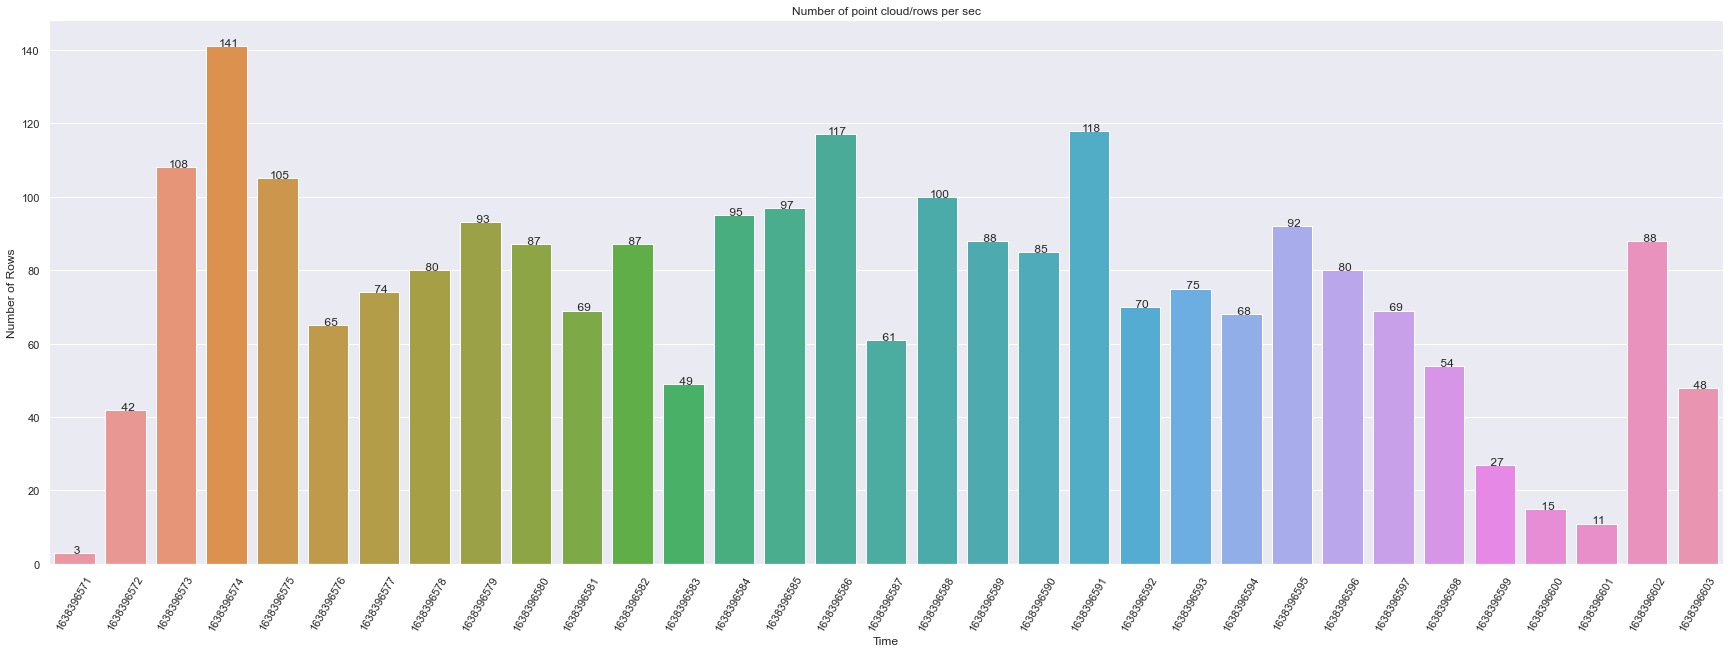

In [39]:
sns.set(rc={'figure.figsize':(30,10)})
ax = sns.countplot(data = radar_scan_df, x="Time")
plt.xlabel("Time")
plt.ylabel("Number of Rows")
plt.title("Number of point cloud/rows per sec")
plt.xticks(rotation=60)
for p in ax.patches:
   ax.annotate('{:3}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

##### Header.seq
- 10033 to 12493 person_1 position a (standing)
- no other information

##### Header.stamp.secs
- Wednesday, December 1, 2021 10:09:31 PM to Wednesday, December 1, 2021 10:10:03 PM
- approx 32 sec person_1 position a (standing)

##### Header.stamp.nsecs
- no information

##### Header.frame_id  
- it has information of to which topic this file belongs that we have in rosbag file

##### Target_idx   
- 0 , 254, 255 we have only these three values person_1 position a (standing)
- no other information

##### Point_id
- used to create frames whenever point_id become zero it is consider as a frame we adopted this idea by someone who previously worked on behaviour detection from point_cloud data you can check his implementation here (https://github.com/nesl/RadHAR)

In [35]:
frame_list = []
frame_no = 0
for index, row in radar_scan_df.iterrows():
    if row["point_id"] == 0 :
        frame_no+=1
    frame_list.append(frame_no)
radar_scan_df["frame_no"] = np.array(frame_list)

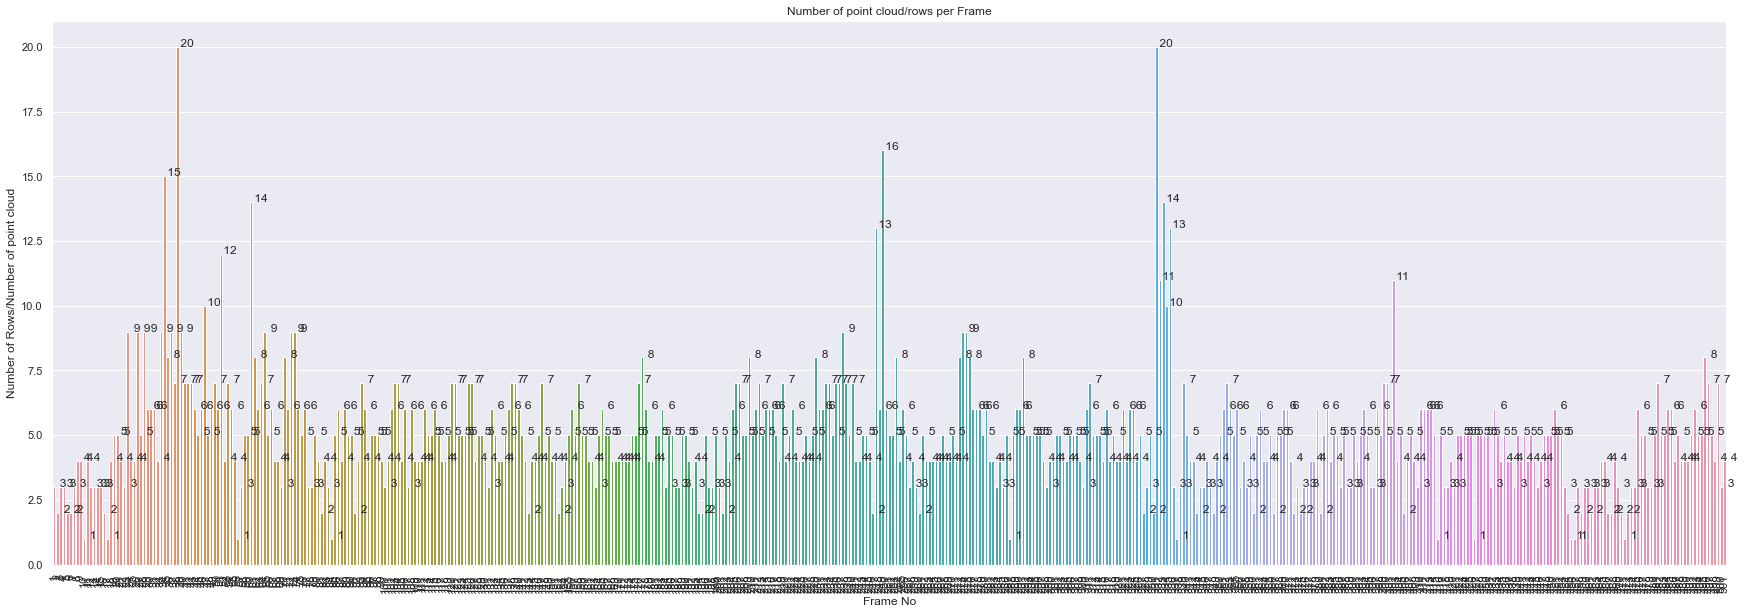

In [47]:
sns.set(rc={'figure.figsize':(30,10)})
ax = sns.countplot(data = radar_scan_df, x="frame_no")
plt.xlabel("Frame No")
plt.ylabel("Number of Rows/Number of point cloud")
plt.title("Number of point cloud/rows per Frame")
plt.xticks(rotation=90)
for p in ax.patches:
   ax.annotate('{:3}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

##### x, y, and z axes cloud points

- Distribution of x y z point cloud of person_1 on the basis of point_id

- Observation:
    - distribution of x lies in between (3, 5)
    - distribution of y lies in between (-1.25, 0.25)
    - distribution of z lies in between (0, 1e20)
- Conclusion:
    - **There is a outliers in z axis points**

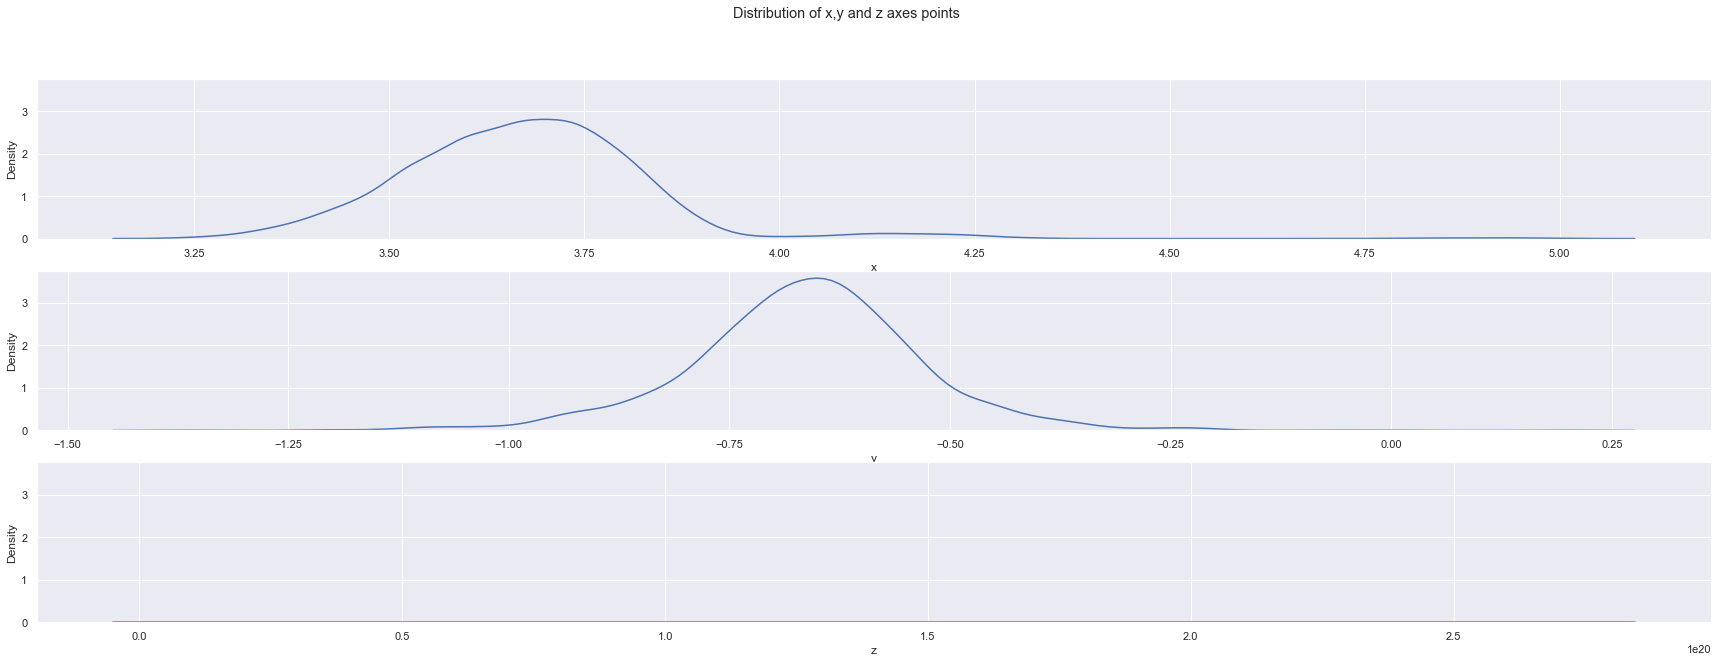

In [66]:
fig, axs = plt.subplots(3, sharey=True)
fig.suptitle('Distribution of x,y and z axes points')
ax_x = sns.kdeplot(radar_scan_df['x'], ax = axs[0], label="x")
ax_y = sns.kdeplot(radar_scan_df['y'], ax = axs[1], label="y")
ax_z = sns.kdeplot(radar_scan_df['z'], ax = axs[2], label="z")
plt.show()

- Finding outliers threshold in z axis of all 30 person

In [80]:
raw_dataset_path = os.path.join("data", "raw")
person_data_list = sorted(os.listdir(raw_dataset_path), key = lambda x: int(x.split("_")[1]) if x!=".DS_Store" else 0)

x = []
y = []
z = []
for person in tqdm(person_data_list[:]):
    if person == ".DS_Store": continue
    person_dir_path = os.path.join(raw_dataset_path, person)
    for bag_file_path in glob.glob(os.path.join(person_dir_path, "*.bag")):
        radar_scan_file_path = bag.message_by_topic('/ti_mmwave/radar_scan')
        radar_scan_df = pd.read_csv(radar_scan_file_path)
        x.extend(radar_scan_df["x"])
        y.extend(radar_scan_df["y"])
        z.extend(radar_scan_df["z"])

print(len(x))
print(len(y))
print(len(z))

100%|██████████| 31/31 [00:29<00:00,  1.05it/s]

369150
369150
369150


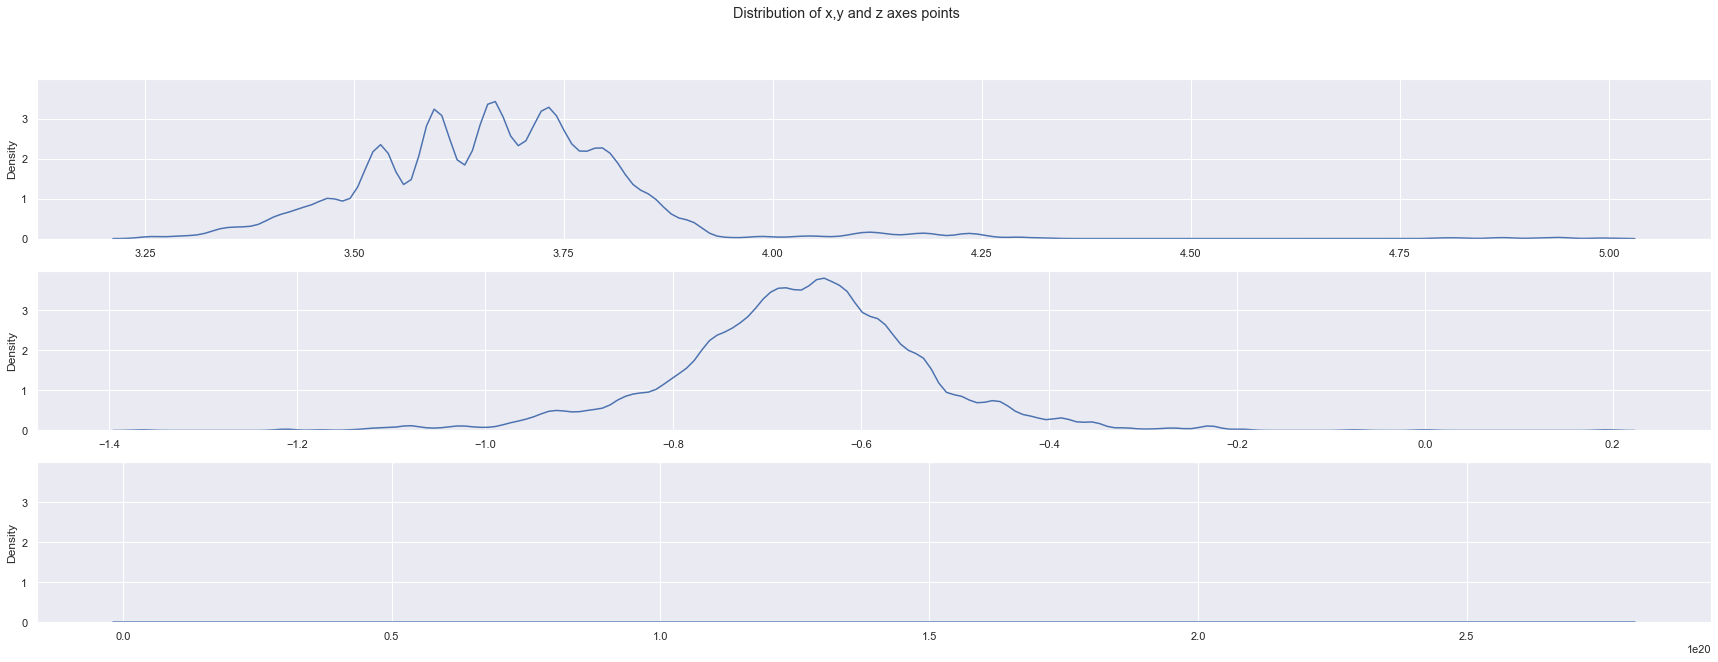

In [81]:
fig, axs = plt.subplots(3, sharey=True)
fig.suptitle('Distribution of x,y and z axes points')
ax_x = sns.kdeplot(x, ax = axs[0], label="x")
ax_y = sns.kdeplot(y, ax = axs[1], label="y")
ax_z = sns.kdeplot(z, ax = axs[2], label="z")
plt.show()

- point cloud visualization on the basis of point_id
- to see the code visit (**point_cloud_visualization**) directory under exploratory-data-analysis

- falling on the basis of point id<br>
<img src="./visuals/falling.gif">

- laying on the basis of point id <br>
<img src="./visuals/laying.gif" >

- sitting on the basis of point id<br>
<img src="./visuals/sitting.gif" >

- standing on the basis of point id<br>
<img src="./visuals/standing.gif" >

- walking on the basis of point id<br>
<img src="./visuals/walking.gif" >

- point cloud (x,y,z) visualzation on the basis of time
- to see the code visit (**point_cloud_visualization**) directory under exploratory-data-analysis

- falling on the basis of time<br>
<img src="./visuals/falling_time.gif" >

- sitting on the basis of time<br>
<img src="./visuals/sitting_time.gif">

- laying on the basis of time<br>
<img src="./visuals/laying_time.gif">

- standing on the basis of time<br>
<img src="./visuals/standing_time.gif">

- walking on the basis of time<br>
<img src="./visuals/walking_time.gif">

##### range 

- range represent the distance of the object and is also calculated using IF (integrated frequency) signal<br>
<img src="./visuals/range.png">

##### velocity 

- simply refers to the velocity of object that is calculated after digitization of IF (integrated frequency) signal and is used to determine the the objects that are close to each other and cannot be separated on the basis of distance in fourier transform<br>
<img src="./visuals/velocity.png" >

##### doppler_bin 

- The Doppler effect or Doppler shift is the change in frequency of a wave in relation to an observer who is moving relative to the wave source<br>
<img src="./visuals/doppler.png">

- visualization of doppler bin w.r.t time

###### falling doppler bin w.r.t time

In [38]:
dataframe = pd.read_csv('../../data/raw/person_1/e/ti_mmwave-radar_scan.csv')

In [39]:
sns.set_style('dark')

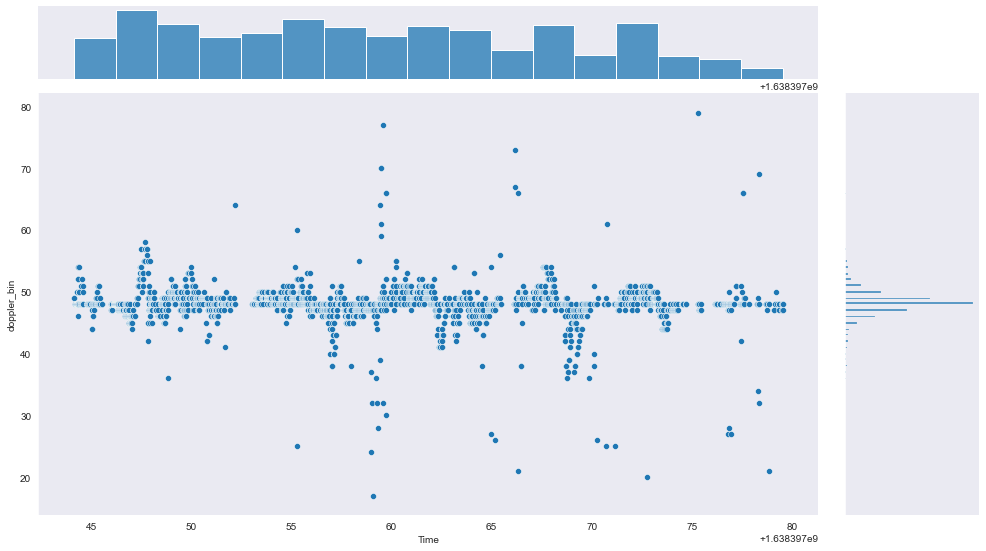

In [40]:
g = sns.jointplot(x='Time',y='doppler_bin',data=dataframe)
g.fig.set_figwidth(15)
g.fig.set_figheight(8)

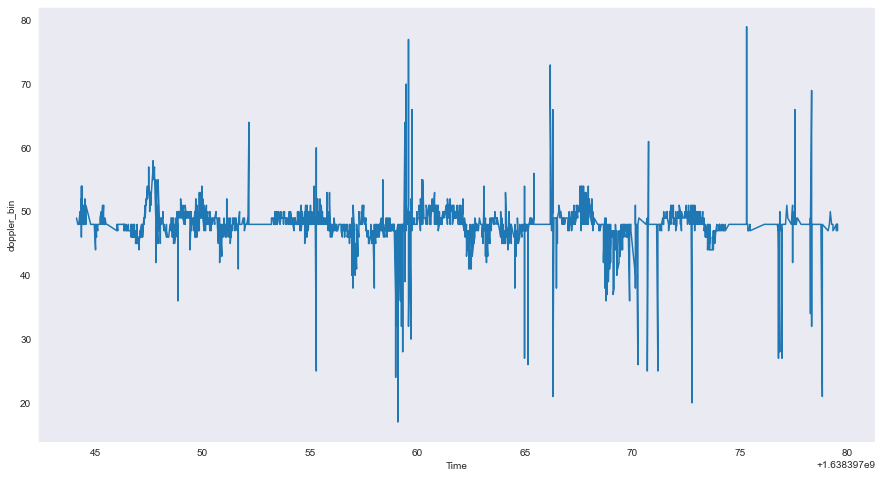

In [41]:
p = sns.lineplot(x='Time',y='doppler_bin',data=dataframe)
p.figure.set_figwidth(15)
p.figure.set_figheight(8)

###### sitting doppler bin w.r.t time

In [42]:
dataframe = pd.read_csv('../../data/raw/person_1/c/ti_mmwave-radar_scan.csv')

In [43]:
sns.set_style('dark')

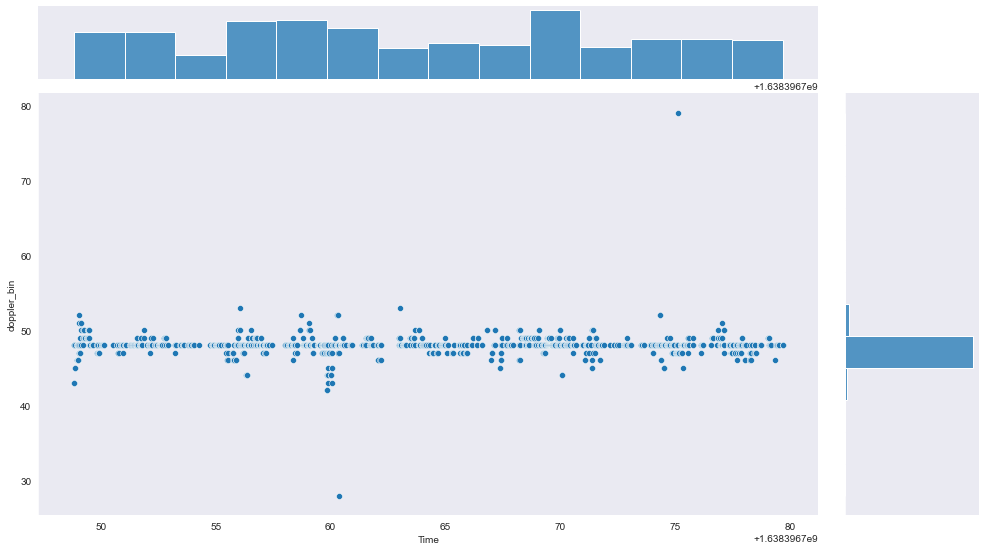

In [44]:
g = sns.jointplot(x='Time',y='doppler_bin',data=dataframe)
g.fig.set_figwidth(15)
g.fig.set_figheight(8)

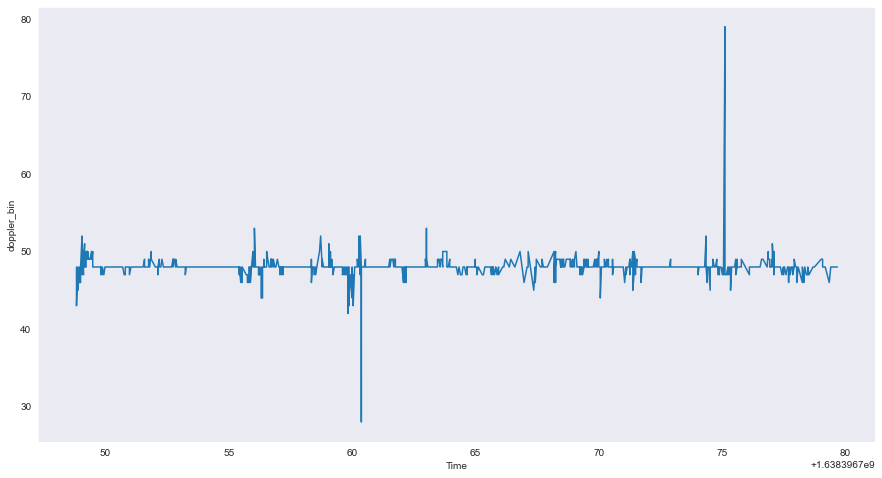

In [45]:
p = sns.lineplot(x='Time',y='doppler_bin',data=dataframe)
p.figure.set_figwidth(15)
p.figure.set_figheight(8)

###### laying doppler bin w.r.t time

In [46]:
dataframe = pd.read_csv('../../data/raw/person_1/d/ti_mmwave-radar_scan.csv')

In [47]:
sns.set_style('dark')

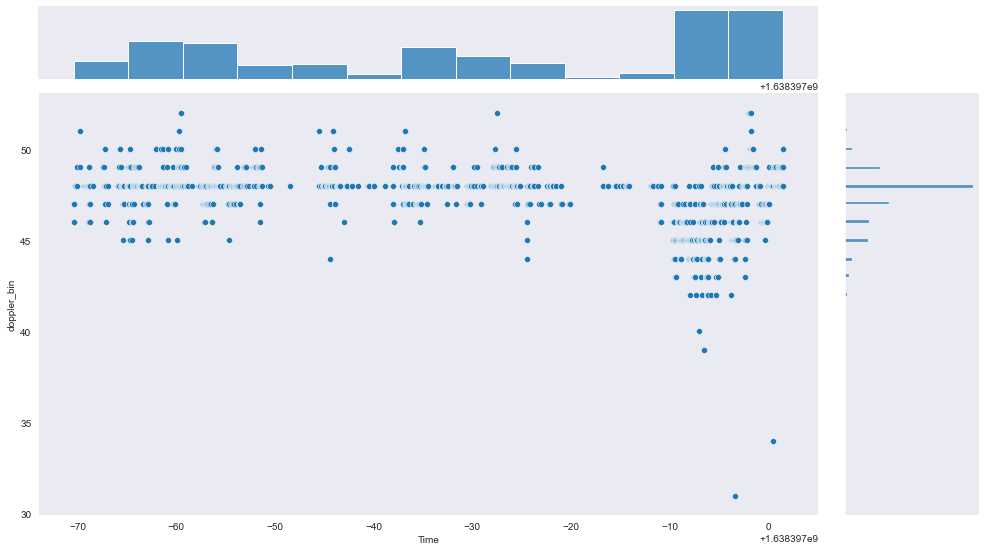

In [48]:
g = sns.jointplot(x='Time',y='doppler_bin',data=dataframe)
g.fig.set_figwidth(15)
g.fig.set_figheight(8)

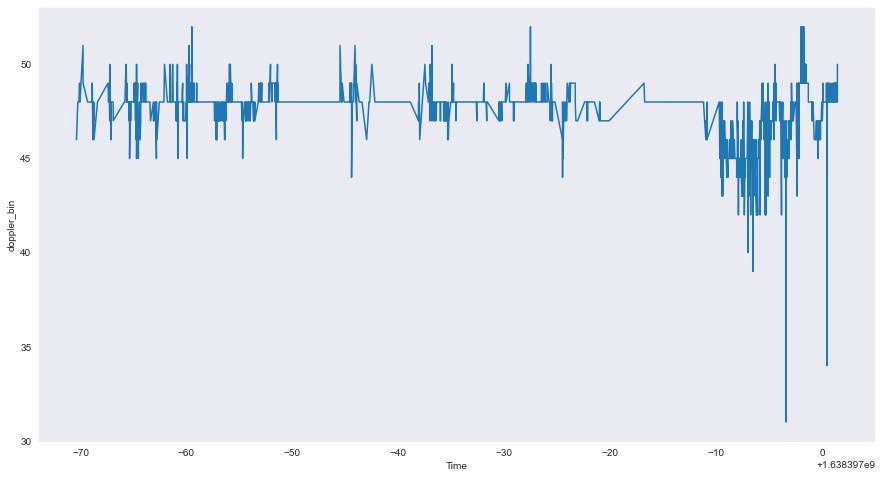

In [49]:
p = sns.lineplot(x='Time',y='doppler_bin',data=dataframe)
p.figure.set_figwidth(15)
p.figure.set_figheight(8)

###### standing doppler bin w.r.t time

In [50]:
dataframe = pd.read_csv('../../data/raw/person_1/a/ti_mmwave-radar_scan.csv')

In [51]:
sns.set_style('dark')

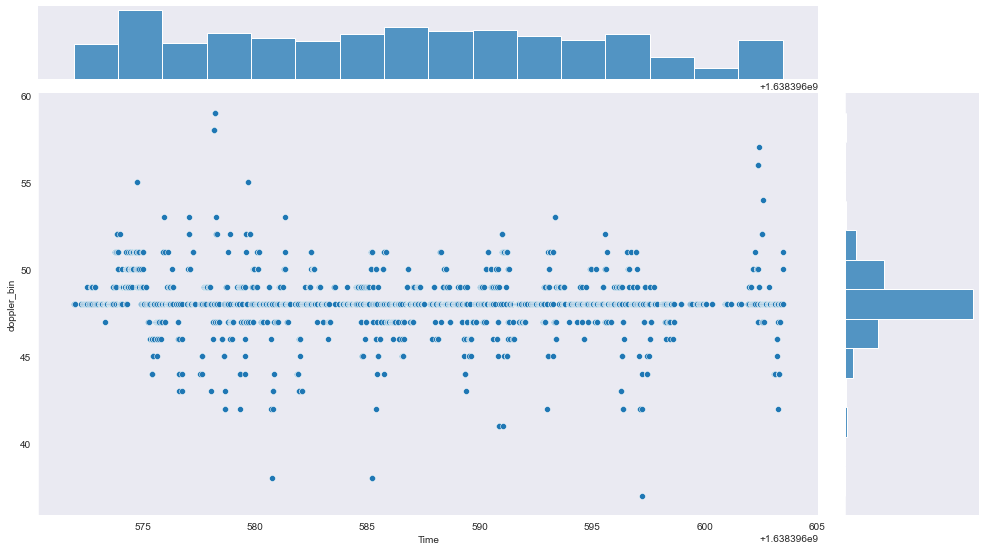

In [52]:
g = sns.jointplot(x='Time',y='doppler_bin',data=dataframe)
g.fig.set_figwidth(15)
g.fig.set_figheight(8)

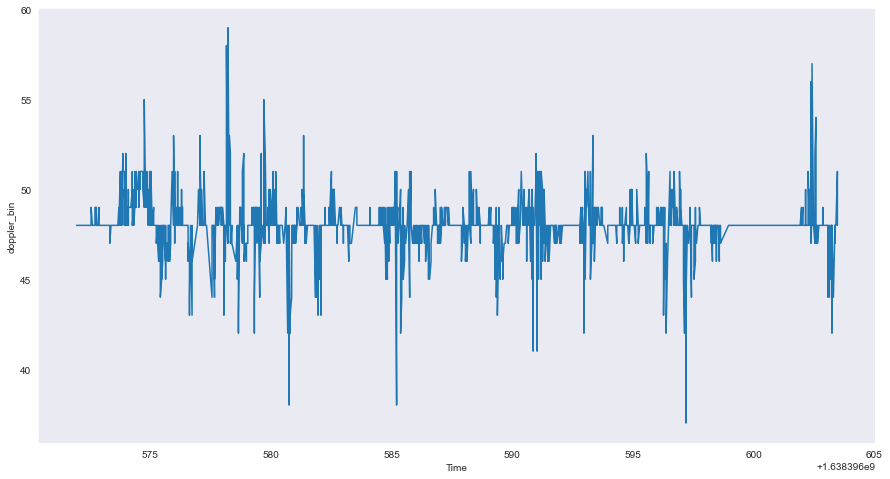

In [53]:
p = sns.lineplot(x='Time',y='doppler_bin',data=dataframe)
p.figure.set_figwidth(15)
p.figure.set_figheight(8)

###### walking doppler bin w.r.t time

In [54]:
dataframe = pd.read_csv('../../data/raw/person_1/b/ti_mmwave-radar_scan.csv')

In [55]:
sns.set_style('dark')

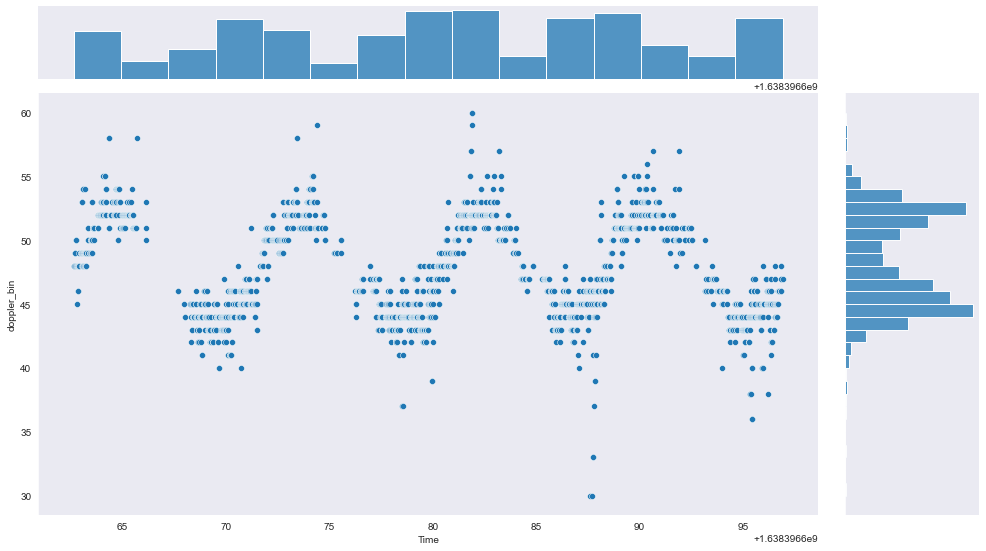

In [56]:
g = sns.jointplot(x='Time',y='doppler_bin',data=dataframe)
g.fig.set_figwidth(15)
g.fig.set_figheight(8)

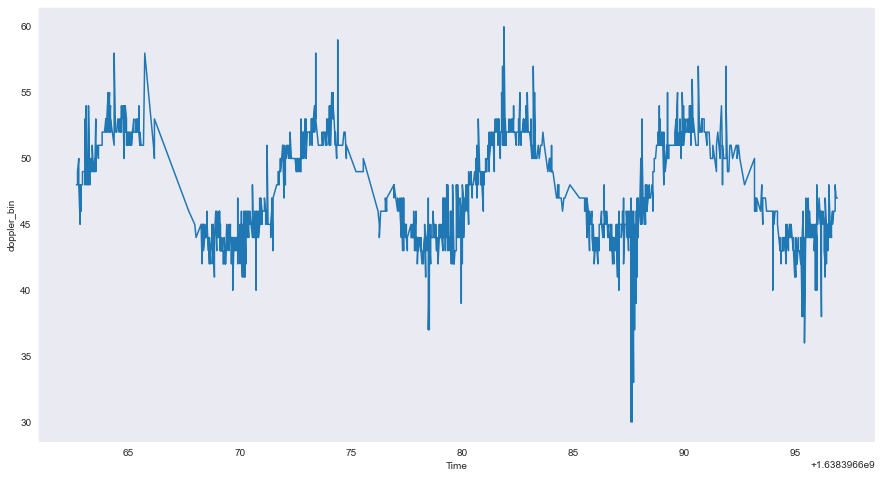

In [57]:
p = sns.lineplot(x='Time',y='doppler_bin',data=dataframe)
p.figure.set_figwidth(15)
p.figure.set_figheight(8)

##### bearing  

- In RADAR technology bearing is the determination of the direction. The True Bearing (referenced to true north) of a radar target is the angle between the true north and a line pointed directly at the target. This angle is measured in the horizontal plane and in a clockwise direction from true north.<br>
<img src="./visuals/bearing.png">

##### intensity
- varies with time

##### elevation  

- the angle of the beam with respect to the ground; called the "elevation angle"<br>
<img src="./visuals/elevation.jpg">

##### posX posY posZ velX velY velZ
- varies with time

#### **micro_doppler** topic Analysis

In [58]:
micro_doppler_df.head()

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,time_domain_bins,num_chirps,target_idx,micro_doppler_array_0,micro_doppler_array_1,...,micro_doppler_array_1916,micro_doppler_array_1917,micro_doppler_array_1918,micro_doppler_array_1919,posX,posY,posZ,velX,velY,velZ
0,1.638397e+09,620,1638396571,949765920,micro_doppler,20,96,0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.416760,0.759456,-0.002027,0.046640,0.095910,0.038094
1,1.638397e+09,621,1638396572,9708881,micro_doppler,20,96,0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.432895,0.755421,0.025913,-0.015736,0.086766,-0.010388
2,1.638397e+09,622,1638396572,281094074,micro_doppler,20,96,0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.429770,0.753097,0.007167,-0.019777,0.108594,-0.015153
3,1.638397e+09,623,1638396572,340569972,micro_doppler,20,96,0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.448136,0.703575,0.025396,-0.018378,0.068987,-0.012915
4,1.638397e+09,624,1638396572,387259960,micro_doppler,20,96,0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.445365,0.735171,0.032171,0.034106,0.086445,0.032247


##### time_domain_bins 

- the way to view signal
- for person_1 a(standing) position its value is 20 constant<br>
<img src="./visuals/time_domain_bin.png">

##### num_chirps  

- may be chirp frequency
- for person_1 a(standing) position its value is 96 constant<br>
<img src="./visuals/chirp.png">

##### target_idx
- for person_1 a(standing) position its value is 0 constant

##### micro_doppler_array  
- no information

##### posX posY posZ velX velY velZ
- varies with time

#### **tf** topic Analysis

In [59]:
tf_df.head()

,Time,transforms
0,1.638397e+09,[header: \n seq: 0\n stamp: \n secs: 1638...
1,1.638397e+09,[header: \n seq: 0\n stamp: \n secs: 1638...
2,1.638397e+09,[header: \n seq: 0\n stamp: \n secs: 1638...
3,1.638397e+09,[header: \n seq: 0\n stamp: \n secs: 1638...
4,1.638397e+09,[header: \n seq: 0\n stamp: \n secs: 1638...


##### does not have enough information so it is not useful

#### **rosout** topic Analysis

In [60]:
rosout_df.head()

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,level,name,msg,file,function,line,topics
0,1.638397e+09,4,1638396571,728653092,NaN,2,/record_1638396571599195435,Subscribing to /rosout,/tmp/binarydeb/ros-melodic-rosbag-1.14.12/src/...,shared_ptr<ros::Subscriber> rosbag::Recorder::...,255,['/rosout']
1,1.638397e+09,5,1638396571,741787467,NaN,2,/record_1638396571599195435,Subscribing to /tf,/tmp/binarydeb/ros-melodic-rosbag-1.14.12/src/...,shared_ptr<ros::Subscriber> rosbag::Recorder::...,255,['/rosout']
2,1.638397e+09,6,1638396571,753759654,NaN,2,/record_1638396571599195435,Subscribing to /clicked_point,/tmp/binarydeb/ros-melodic-rosbag-1.14.12/src/...,shared_ptr<ros::Subscriber> rosbag::Recorder::...,255,['/rosout']
3,1.638397e+09,7,1638396571,765667779,NaN,2,/record_1638396571599195435,Subscribing to /initialpose,/tmp/binarydeb/ros-melodic-rosbag-1.14.12/src/...,shared_ptr<ros::Subscriber> rosbag::Recorder::...,255,['/rosout']
4,1.638397e+09,8,1638396571,778337154,NaN,2,/record_1638396571599195435,Subscribing to /ti_mmwave/micro_doppler,/tmp/binarydeb/ros-melodic-rosbag-1.14.12/src/...,shared_ptr<ros::Subscriber> rosbag::Recorder::...,255,['/rosout']


##### does not have enough information so it is not useful